# Prediction of GHI(Global Horizontal Irradiance) value
# Прогнозирование значений GHI (Глобальная горизонтальная освещённость)

### Файлы содержит колонки из набора данных, используемого для прогнозирования GHI (Глобальная горизонтальная освещённость) из базы данных NSRDB (National Solar Radiation Database). 
### Ниже подробно объясню каждую колонку, её физический смысл.
1) Year - Год, в котором были сделаны измерения (например, 2017, 2018, 2019)
2) Month - Месяц года (1–12), в котором проводились измерения
3) Day -  День месяца (1–31), в котором проводились измерения
4) Hour - Час суток (0–23) в местном времени, когда проводились измерения.
5) Minute - Минута часа (0 или 30, судя по данным), когда проводились измерения.
6) Temperature - Температура воздуха на высоте 2 метра над поверхностью земли (°C)
7) Clearsky DHI - Диффузная горизонтальная освещённость (Diffuse Horizontal Irradiance) в условиях ясного неба (Вт/м²)
8) Clearsky DNI - Прямая нормальная освещённость (Direct Normal Irradiance) в условиях ясного неба (Вт/м²)
9) Clearsky GHI - Глобальная горизонтальная освещённость (Global Horizontal Irradiance) в условиях ясного неба (Вт/м²)
10) Cloud Type - Тип облачности (категориальная переменная, обычно от 0 до 10) (Пример значения: 0 (ясное небо)
11) Dew Point - Температура точки росы (°C), при которой воздух становится насыщенным водяным паром
12) DHI - Диффузная горизонтальная освещённость (Diffuse Horizontal Irradiance) в реальных условиях (Вт/м²).
13) DNI - Прямая нормальная освещённость (Direct Normal Irradiance) в реальных условиях (Вт/м²).
14) Fill Flag - Флаг, указывающий на качество данных или метод заполнения пропусков (например, 0 — измеренные данные, 1 — заполненные).
15) GHI - Глобальная горизонтальная освещённость (Global Horizontal Irradiance) — суммарная солнечная радиация, падающая на горизонтальную поверхность (Вт918/м²).
16) Ozone - Концентрация озона в атмосфере (в единицах, например, Dobson Units) (например: 0.373)
17) Relative Humidity - Относительная влажность воздуха (%)
18) Solar Zenith Angle - Угол между зенитом (вертикалью над точкой наблюдения) и направлением на солнце (градусы).
19) Surface Albedo - Альбедо поверхности — доля отражённого солнечного излучения (0–1) (например: 0.16).
20) Pressure - Атмосферное давление на уровне поверхности (гПа).
21) Precipitable Water - Количество водяного пара в столбе атмосферы (мм или кг/м²)(например: 1.267).
22) Wind Direction - Направление ветра (градусы, 0–360, где 0 — север) 
23) Wind Speed - Скорость ветра на высоте 10 метров (м/с).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка данных за 2017, 2018 и 2019 годы
data_2017 = pd.read_csv('2926703_40.41_67.22_2017.csv', skiprows=2)
data_2018 = pd.read_csv('2926703_40.41_67.22_2018.csv', skiprows=2)
data_2019 = pd.read_csv('2926703_40.41_67.22_2019.csv', skiprows=2)

In [3]:
# Объединение данных в один DataFrame
data_combined = pd.concat([data_2017, data_2018, data_2019], ignore_index=True)

In [4]:
# Коррекция времени: перевод из UTC в UTC+5
data_combined['Hour'] = (data_combined['Hour'] + 5) % 24

In [5]:
data_combined.tail()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,Fill Flag,GHI,Ozone,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
26275,2019,12,31,0,30,-1.6,0,0,0,0,...,0,0,0.392,97.42,162.64,0.18,964,0.8,102,1.1
26276,2019,12,31,1,30,-1.6,0,0,0,0,...,0,0,0.391,95.72,159.04,0.18,964,0.8,111,1.0
26277,2019,12,31,2,30,-1.5,0,0,0,7,...,0,0,0.390,93.41,150.11,0.18,964,0.7,135,0.7
26278,2019,12,31,3,30,-1.5,0,0,0,7,...,0,0,0.389,91.95,139.31,0.18,964,0.7,184,0.6
26279,2019,12,31,4,30,-1.5,0,0,0,7,...,0,0,0.390,90.85,127.97,0.18,963,0.7,216,0.6


In [6]:
data_combined.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'Fill Flag', 'GHI', 'Ozone', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed'],
      dtype='object')

In [7]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                26280 non-null  int64  
 1   Month               26280 non-null  int64  
 2   Day                 26280 non-null  int64  
 3   Hour                26280 non-null  int64  
 4   Minute              26280 non-null  int64  
 5   Temperature         26280 non-null  float64
 6   Clearsky DHI        26280 non-null  int64  
 7   Clearsky DNI        26280 non-null  int64  
 8   Clearsky GHI        26280 non-null  int64  
 9   Cloud Type          26280 non-null  int64  
 10  Dew Point           26280 non-null  float64
 11  DHI                 26280 non-null  int64  
 12  DNI                 26280 non-null  int64  
 13  Fill Flag           26280 non-null  int64  
 14  GHI                 26280 non-null  int64  
 15  Ozone               26280 non-null  float64
 16  Rela

In [8]:
#26,280 строк, 23 столбца, без пропусков (все столбцы имеют 26,280 ненулевых значений)

In [9]:
data_combined.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,26280.0,2018.000000,0.816512,2017.000,2017.0000,2018.000,2019.0000,2019.000
Month,26280.0,6.526027,3.447917,1.000,4.0000,7.000,10.0000,12.000
Day,26280.0,15.720548,8.796414,1.000,8.0000,16.000,23.0000,31.000
Hour,26280.0,11.500000,6.922318,0.000,5.7500,11.500,17.2500,23.000
Minute,26280.0,30.000000,0.000000,30.000,30.0000,30.000,30.0000,30.000
Temperature,26280.0,14.923390,12.091533,-17.000,4.8000,14.300,24.1000,44.200
Clearsky DHI,26280.0,70.292618,87.710155,0.000,0.0000,0.000,136.0000,572.000
Clearsky DNI,26280.0,274.080898,325.547207,0.000,0.0000,0.000,611.0000,972.000
Clearsky GHI,26280.0,229.345586,304.536054,0.000,0.0000,0.000,449.0000,1030.000
Cloud Type,26280.0,2.291134,2.907058,0.000,0.0000,0.000,4.0000,9.000


In [10]:
###########################

Text(0.5, 1.0, 'Среднее GHI по часам')

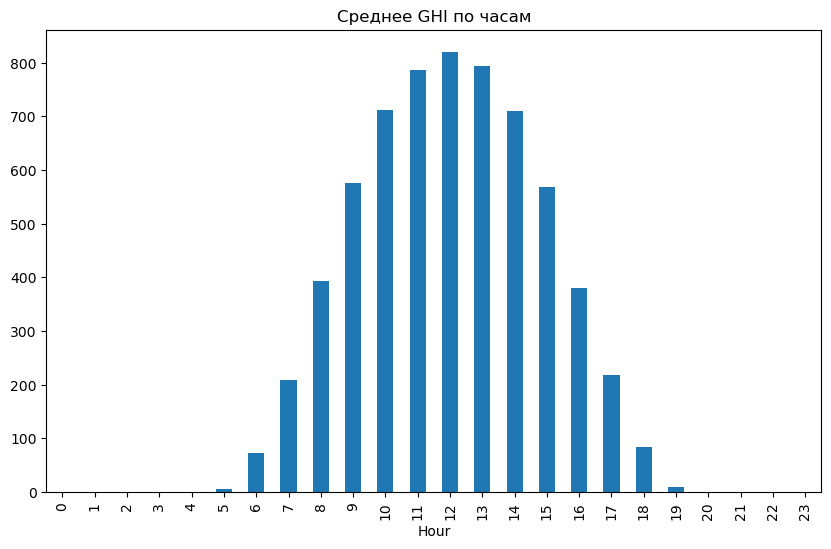

In [11]:
hourly_avg = data_combined[data_combined['Cloud Type'] == 0].groupby('Hour')['GHI'].mean()
hourly_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Среднее GHI по часам')

In [12]:
# GHI зависит от времени суток, с максимумом в полдень, что ожидаемо из-за положения солнца

Text(0.5, 1.0, 'Средние значения по месяцам')

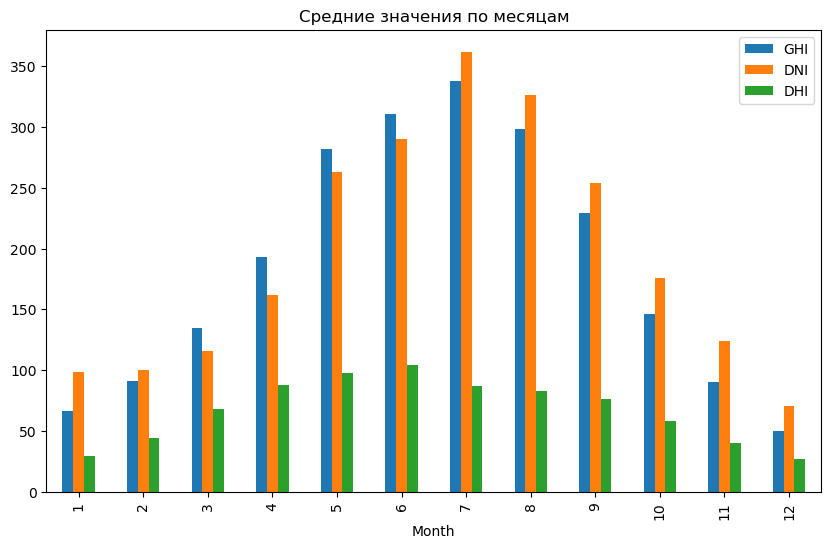

In [13]:
monthly_avg_1 = data_combined.groupby('Month')[['GHI', 'DNI', 'DHI']].mean()
monthly_avg_1.plot(kind='bar', figsize=(10, 6))
plt.title('Средние значения по месяцам')

Text(0.5, 1.0, 'Средние значения по месяцам')

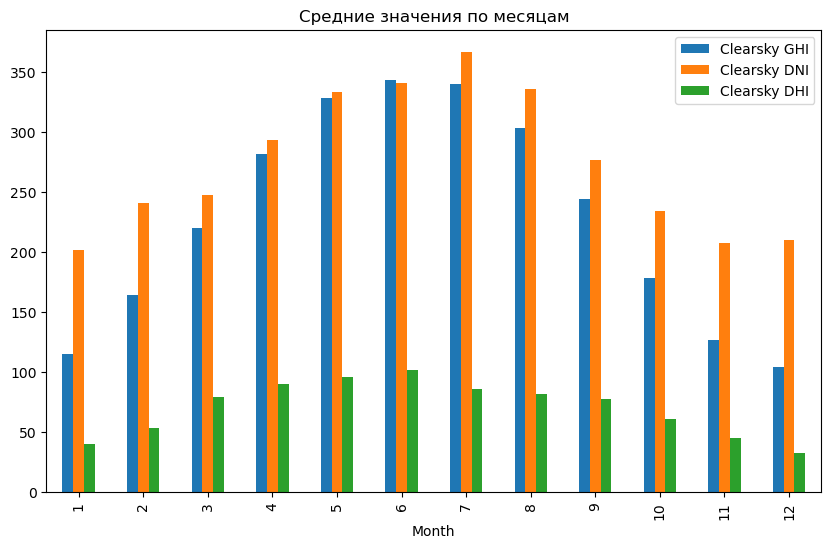

In [14]:
monthly_avg_2 = data_combined.groupby('Month')[['Clearsky GHI', 'Clearsky DNI', 'Clearsky DHI']].mean()
monthly_avg_2.plot(kind='bar', figsize=(10, 6))
plt.title('Средние значения по месяцам')

Text(0.5, 1.0, 'GHI в зависимости от типа облачности')

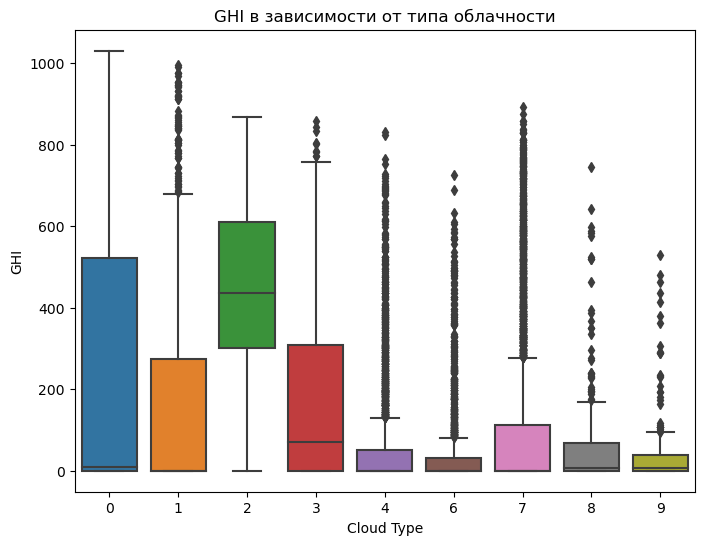

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cloud Type', y='GHI', data=data_combined)
plt.title('GHI в зависимости от типа облачности')

In [16]:
# Мы знаем что Cloud Type - это категориальная переменная (0–9), где 0 — ясное небо, а 1–9 — различные типы облаков (например, 1 — кучевые, 7 — плотные облака, 9 — грозовые).
# По мере роста номера Cloud Type (т.е. увеличение облачности) медианный GHI снижается. 
# Например: Лёгкие облака (1–3) дают умеренное снижение GHI.Плотные облака (7–9) значительно снижают GHI (медиана может быть близка к 0), так как блокируют солнечную радиацию. Точки за пределами усов показывают аномалии, например, высокий GHI при плотных облаках (возможно, кратковременные просветы).
# График подтверждает, что облачность (Cloud Type) сильно влияет на GHI.

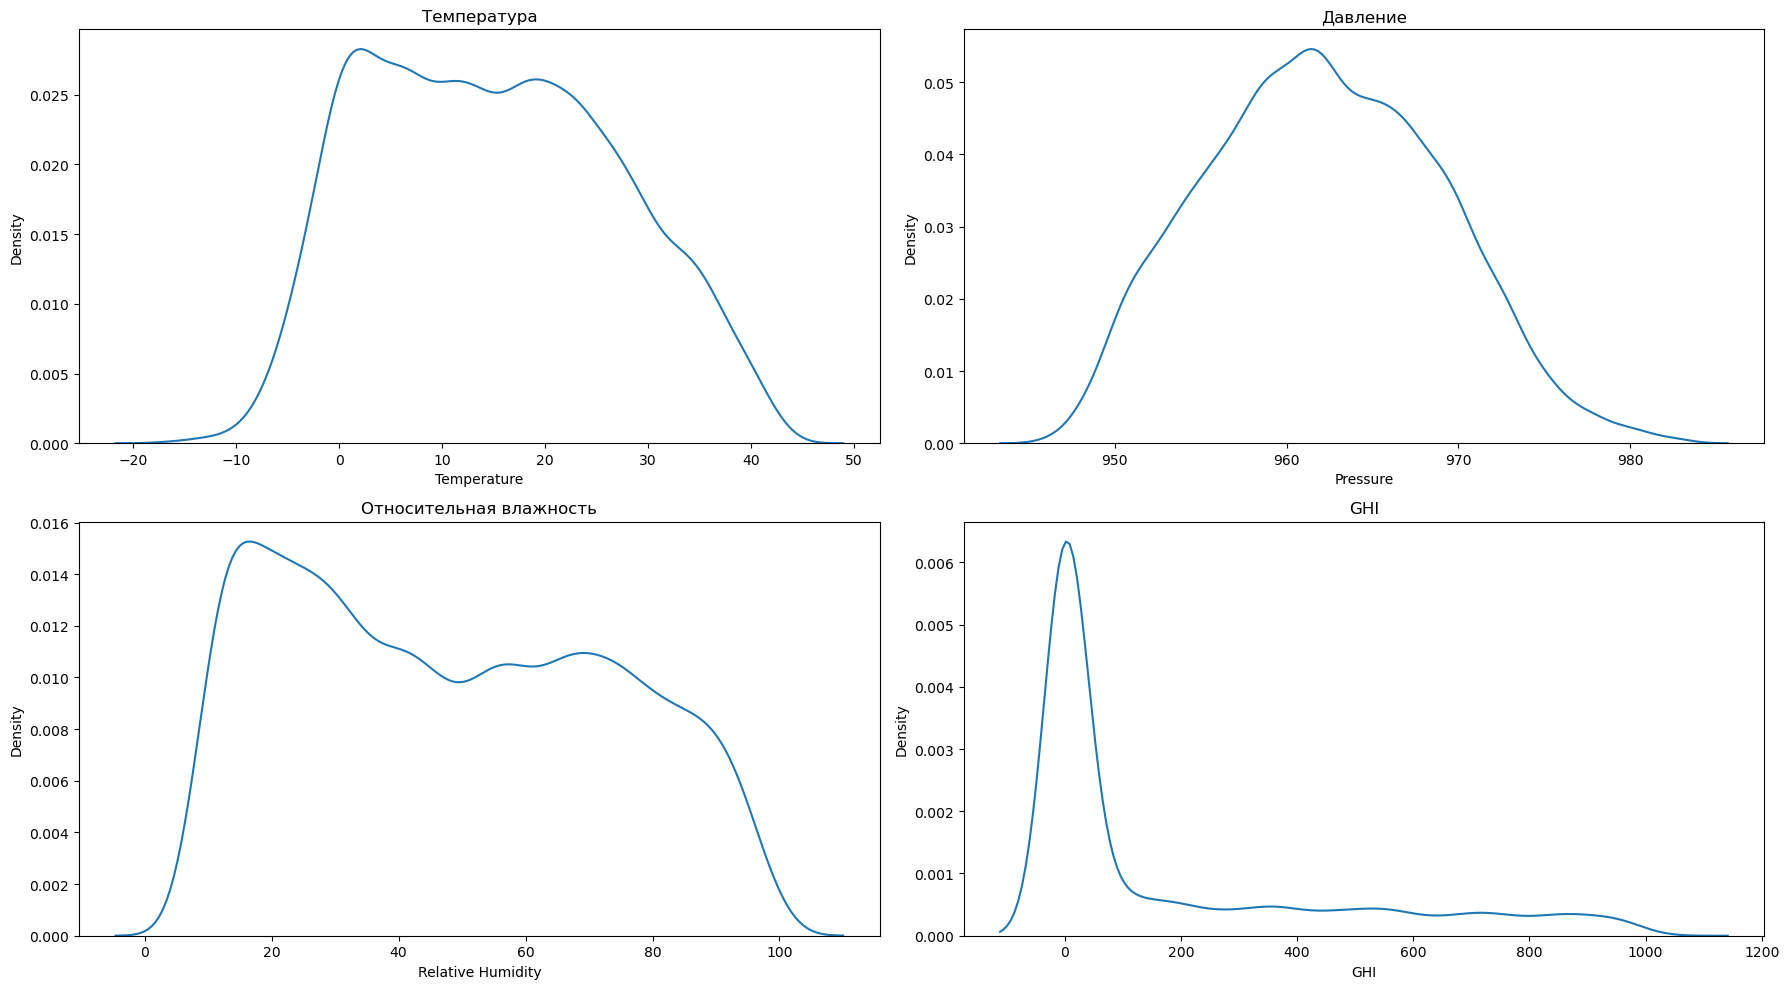

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# График плотности для Temperature, GHI, Pressure и Relative Humidity

sns.kdeplot(data_combined['Temperature'], ax=axes[0][0])
axes[0][0].set_title('Температура')

sns.kdeplot(data_combined['Pressure'], ax=axes[0][1])
axes[0][1].set_title('Давление')

sns.kdeplot(data_combined['Relative Humidity'], ax=axes[1][0])
axes[1][0].set_title('Относительная влажность')

sns.kdeplot(data_combined['GHI'], ax=axes[1][1])
axes[1][1].set_title('GHI')

plt.tight_layout()

In [18]:
#Температура — большинство значений находится в среднем диапазоне.
#Давление — наблюдается один выраженный пик.
#Влажность — также сосредоточена в нижнем диапазоне, с редкими высокими значениями.
#В гистограмма GHI больше имеет пик около 0, так как это ночные данные

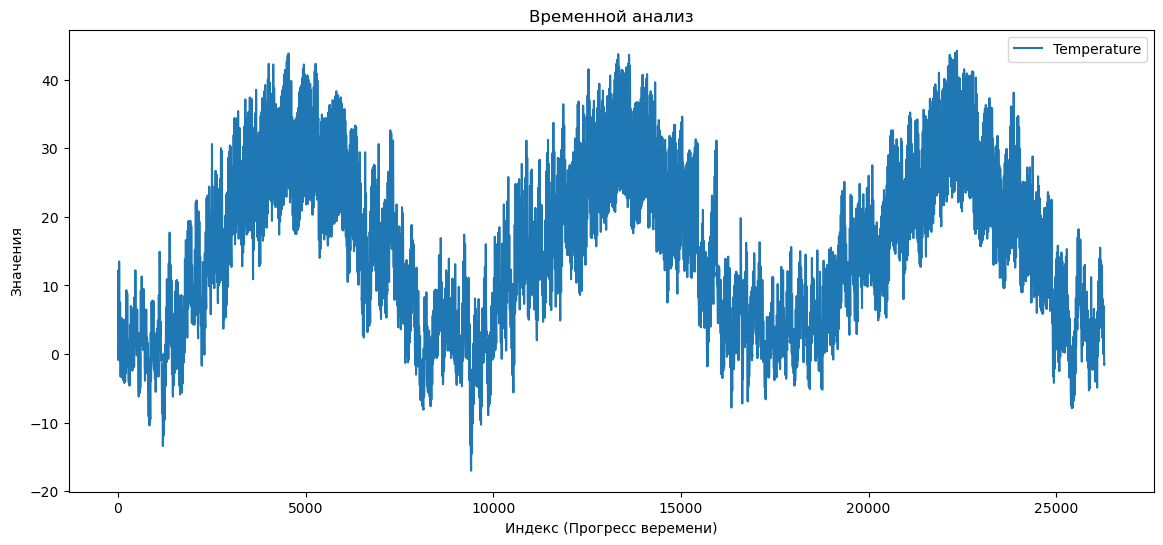

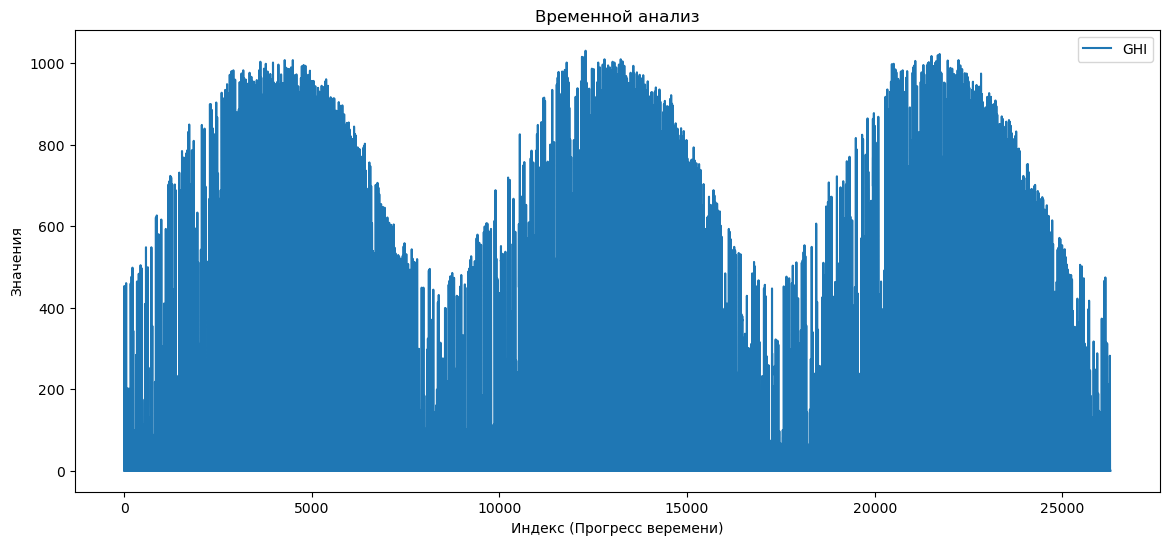

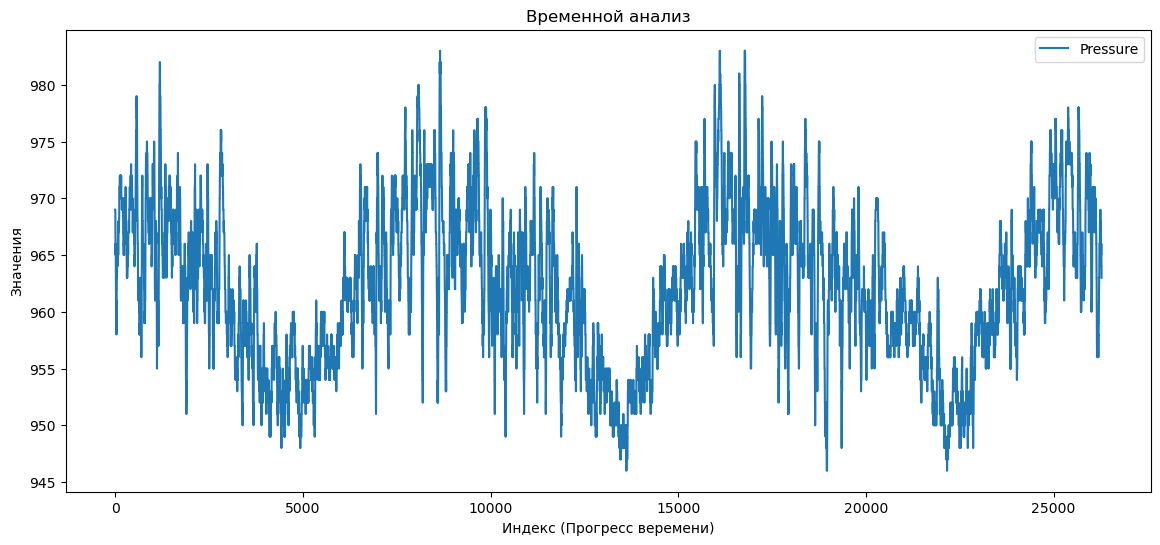

In [19]:
for feature in ['Temperature', 'GHI', 'Pressure']:
    plt.figure(figsize=(14, 6))
    plt.plot(data_combined.index, data_combined[feature], label=feature)
    plt.xlabel('Индекс (Прогресс веремени)')
    plt.ylabel('Значения')
    plt.title('Временной анализ')
    plt.legend()

In [20]:
# GHI, температура и давление изменяются циклически.

Text(0.5, 1.0, 'Корреляционная матрица признаков и GHI')

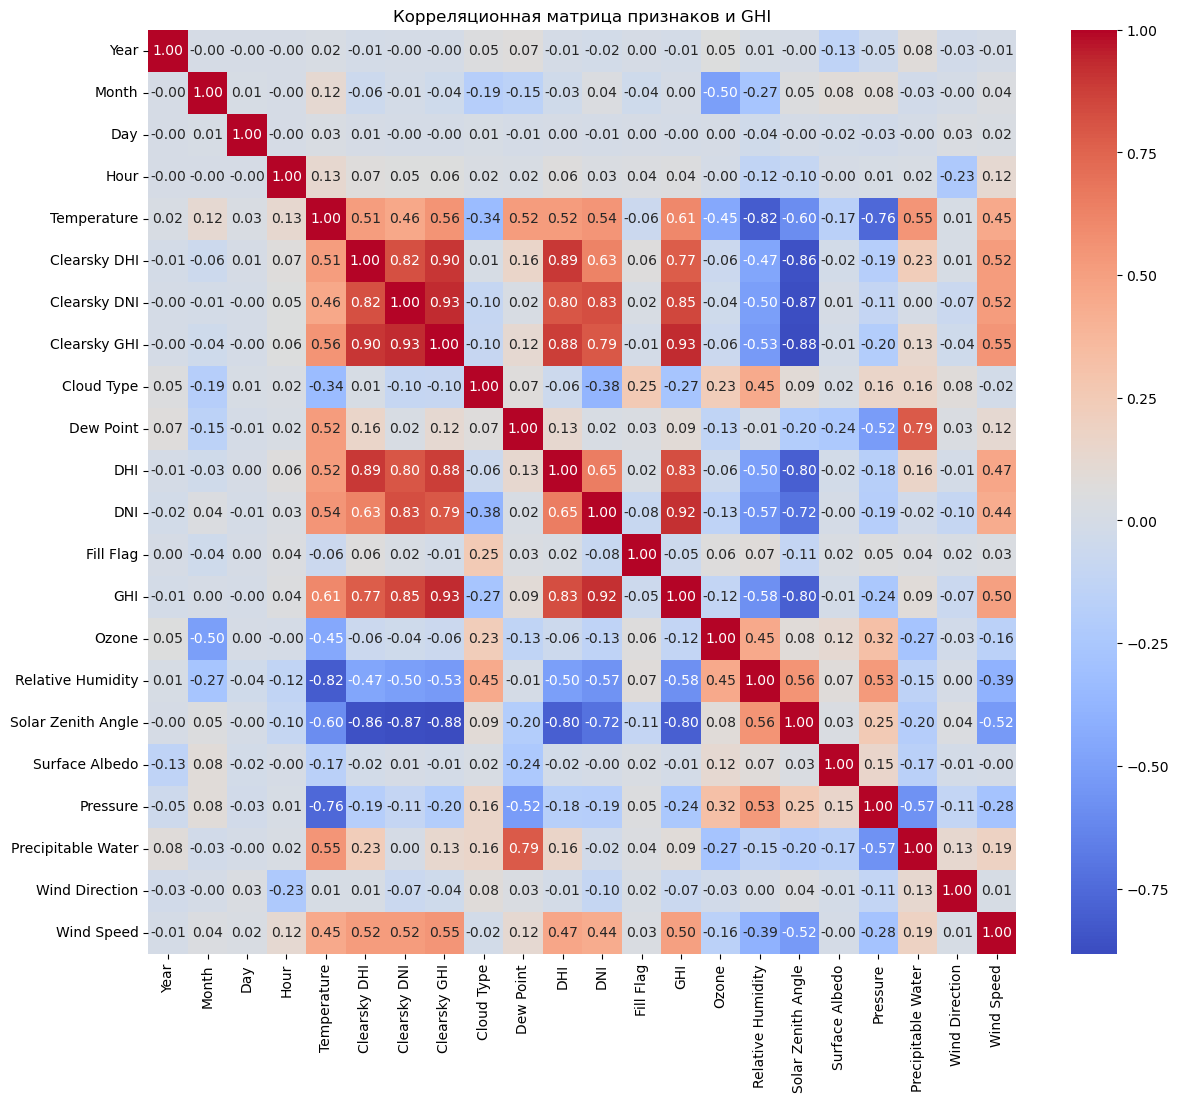

In [21]:
correlation_matrix = data_combined.drop('Minute', axis=1).corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Корреляционная матрица признаков и GHI')

In [22]:
# Выберим признаки с корреляцией с GHI выше определённого порога (например, |corr| > 0.5):

In [23]:
ghi_corr = correlation_matrix['GHI'].abs().sort_values(ascending=False)
ghi_corr

GHI                   1.000000
Clearsky GHI          0.927555
DNI                   0.918477
Clearsky DNI          0.850415
DHI                   0.827246
Solar Zenith Angle    0.801154
Clearsky DHI          0.772701
Temperature           0.608528
Relative Humidity     0.578507
Wind Speed            0.499569
Cloud Type            0.265355
Pressure              0.243224
Ozone                 0.115923
Dew Point             0.093622
Precipitable Water    0.085997
Wind Direction        0.072240
Fill Flag             0.054573
Hour                  0.044803
Year                  0.014306
Surface Albedo        0.012096
Month                 0.004454
Day                   0.002293
Name: GHI, dtype: float64

In [24]:
important_features = ghi_corr[ghi_corr > 0.5].index.tolist()

In [25]:
print("Признаки с |corr| > 0.5:", important_features)

Признаки с |corr| > 0.5: ['GHI', 'Clearsky GHI', 'DNI', 'Clearsky DNI', 'DHI', 'Solar Zenith Angle', 'Clearsky DHI', 'Temperature', 'Relative Humidity']


In [26]:
# Удаление мультиколлинеарных признаков

In [27]:
high_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)

In [28]:
high_corr = high_corr[high_corr < 1.0][high_corr > 0.8]

In [29]:
print("Высококоррелированные пары:")
print(high_corr)

Высококоррелированные пары:
Clearsky DNI        Clearsky GHI          0.928859
Clearsky GHI        Clearsky DNI          0.928859
                    GHI                   0.927555
GHI                 Clearsky GHI          0.927555
DNI                 GHI                   0.918477
GHI                 DNI                   0.918477
Clearsky GHI        Clearsky DHI          0.898605
Clearsky DHI        Clearsky GHI          0.898605
                    DHI                   0.891113
DHI                 Clearsky DHI          0.891113
Solar Zenith Angle  Clearsky GHI          0.882496
Clearsky GHI        Solar Zenith Angle    0.882496
DHI                 Clearsky GHI          0.875621
Clearsky GHI        DHI                   0.875621
Solar Zenith Angle  Clearsky DNI          0.869484
Clearsky DNI        Solar Zenith Angle    0.869484
Solar Zenith Angle  Clearsky DHI          0.855256
Clearsky DHI        Solar Zenith Angle    0.855256
Clearsky DNI        GHI                   0.850415
GHI

In [30]:
# Удалим Clearsky GHI, Clearsky DHI, Clearsky DNI, Relative Humidity

In [31]:
df = data_combined.drop(['Clearsky GHI', 'Clearsky DHI', 'Clearsky DNI', 'Relative Humidity'], axis=1)

In [32]:
df.head()

,Year,Month,Day,Hour,Minute,Temperature,Cloud Type,Dew Point,DHI,DNI,Fill Flag,GHI,Ozone,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
0,2017,1,1,5,30,-0.8,1,-2.0,0,0,0,0,0.312,116.63,0.14,969,0.7,269,0.6
1,2017,1,1,6,30,-0.8,0,-2.2,0,0,0,0,0.313,105.50,0.14,969,0.7,226,0.6
2,2017,1,1,7,30,-0.4,0,-2.5,0,0,0,0,0.314,94.90,0.14,969,0.7,194,0.9
3,2017,1,1,8,30,1.5,0,-2.4,36,219,0,55,0.316,84.96,0.14,969,0.7,184,1.4
4,2017,1,1,9,30,4.4,4,-1.6,41,0,3,41,0.319,76.50,0.14,968,0.6,175,1.9


In [33]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Cloud Type',
       'Dew Point', 'DHI', 'DNI', 'Fill Flag', 'GHI', 'Ozone',
       'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed'],
      dtype='object')

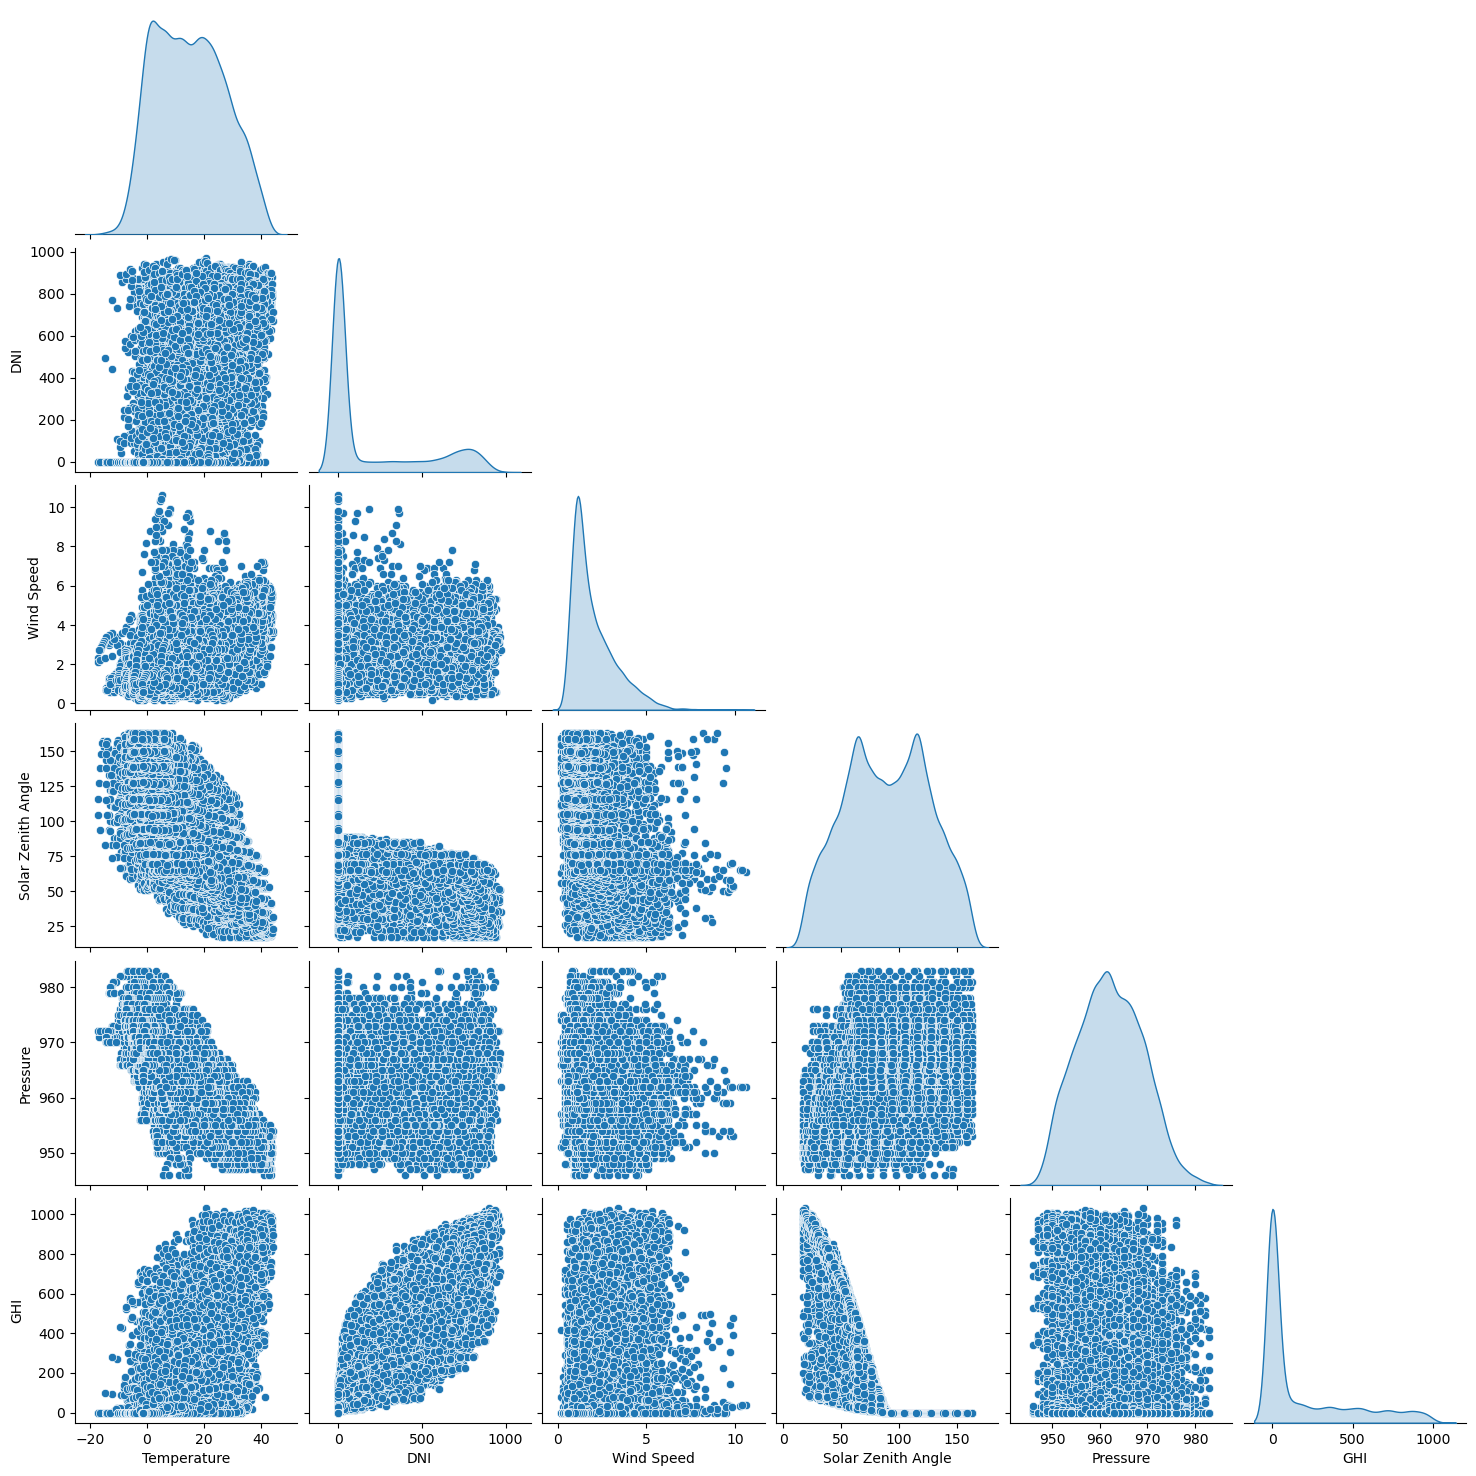

In [34]:
features_to_analyze = ['Temperature', 'DNI', 'Wind Speed', 'Solar Zenith Angle', 'Pressure', 'GHI']

sns.pairplot(df[features_to_analyze], diag_kind='kde', corner=True)

In [35]:
# Solar Zenith Angle и DNI имеют сильное влияние, что логично (угол определяет высоту солнца, а DNI — прямую радиацию).
# Wind Speed и Pressure слабо коррелируют с GHI, их вклад может быть минимальным

In [36]:
# Удалить ночные данные
# Solar Zenith Angle (угол зенита солнца) измеряет угол между зенитом (точкой прямо над головой) и солнцем.
# Если угол > 90 солнце находится ниже горизонта (ночь, раннее утро или поздний вечер) и GHI (Глобальная горизонтальная освещённость) обычно равен 0

In [37]:
data_day = df[data_combined['Solar Zenith Angle'] <= 90]

In [38]:
# Проверка размер данных до и после фильтрации
print(f"Размер данных до фильтрации: {len(df)}")
print(f"Размер данных после фильтрации: {len(data_day)}")

Размер данных до фильтрации: 26280
Размер данных после фильтрации: 13296


In [39]:
data_day['GHI'].describe()

count    13296.000000
mean       368.459838
std        304.294444
min          0.000000
25%         75.000000
50%        318.500000
75%        613.000000
max       1030.000000
Name: GHI, dtype: float64

In [40]:
data_day[data_day['GHI']==0]['Solar Zenith Angle'].unique()

array([89.86, 89.7 , 89.54, 89.36, 89.18, 89.  , 89.99, 89.8 , 89.61,
       89.41, 89.21, 89.84, 89.66, 89.49, 89.31, 89.14, 89.95, 89.68,
       89.42, 89.15, 89.96, 89.78, 89.44, 89.25, 89.88, 89.08, 89.73,
       89.59, 89.29, 89.09, 89.23, 89.5 , 89.63, 89.77, 89.9 , 89.28,
       89.48, 89.67, 89.43, 89.71, 89.98, 89.01, 89.19, 89.35, 89.65,
       89.81, 90.  , 89.58, 89.53, 89.87, 89.75, 89.05, 89.45, 89.24,
       89.03, 89.93, 89.55, 89.37, 87.36, 89.76, 89.22, 89.82, 89.64,
       89.46, 89.91, 89.11, 89.62, 89.33, 88.46, 89.17, 89.02, 89.06,
       89.32, 89.6 , 89.04, 89.3 , 89.79, 89.1 , 89.94, 89.26, 89.92,
       89.51, 89.07, 89.56, 88.73, 89.34, 89.2 , 89.16, 89.57, 89.38,
       89.97, 89.85, 89.27, 89.47, 89.89])

In [41]:
# Это говорит о том, что нулевые значения связаны с граничными углами. Когда Solar Zenith Angle ≈ 90° (утро/вечер), GHI может быть 0 из-за низкого положения солнца.
# Даже при угле < 90 плотные облака могут блокировать радиацию, приводя к GHI = 0

In [42]:
data_day[data_day['GHI']==0]['Solar Zenith Angle'].min()

87.36

In [43]:
# Ужесточить фильтрацию по углу
data_day = data_day[data_day['Solar Zenith Angle'] < 87]

In [44]:
data_day['GHI'].describe()

count    12707.000000
mean       385.191233
std        300.940097
min          2.000000
25%         99.000000
50%        344.000000
75%        631.500000
max       1030.000000
Name: GHI, dtype: float64

In [45]:
data_day 

,Year,Month,Day,Hour,Minute,Temperature,Cloud Type,Dew Point,DHI,DNI,Fill Flag,GHI,Ozone,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
3,2017,1,1,8,30,1.5,0,-2.4,36,219,0,55,0.316,84.96,0.14,969,0.7,184,1.4
4,2017,1,1,9,30,4.4,4,-1.6,41,0,3,41,0.319,76.50,0.14,968,0.6,175,1.9
5,2017,1,1,10,30,7.2,3,-1.7,103,0,1,103,0.321,69.67,0.14,968,0.6,173,2.2
6,2017,1,1,11,30,9.6,0,-1.5,95,776,0,421,0.324,65.12,0.14,967,0.6,186,2.3
7,2017,1,1,12,30,11.3,0,-1.3,102,782,0,453,0.326,63.36,0.14,966,0.6,209,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26263,2019,12,31,12,30,6.1,2,-0.1,196,193,0,282,0.388,63.50,0.18,966,1.1,112,1.5
26264,2019,12,31,13,30,6.8,2,-0.1,186,117,3,236,0.387,64.81,0.18,966,1.1,112,1.4
26265,2019,12,31,14,30,7.0,3,-0.1,26,0,3,26,0.386,68.98,0.18,965,1.1,103,1.3
26266,2019,12,31,15,30,6.2,1,-0.1,81,520,0,211,0.386,75.50,0.18,965,1.1,86,1.0


In [46]:
data_day['Datetime'] = pd.to_datetime(data_day[['Year', 'Month', 'Day', 'Hour', 'Minute']])
data_day.set_index('Datetime', inplace=True)

In [47]:
data_day['Month'] = data_day.index.month
data_day['Day'] = data_day.index.day
data_day['Hour'] = data_day.index.hour

In [48]:
data_day[['GHI', 'Temperature', 'DNI', 'Solar Zenith Angle']].head()

,GHI,Temperature,DNI,Solar Zenith Angle
Datetime,,,,
2017-01-01 08:30:00,55,1.5,219,84.96
2017-01-01 09:30:00,41,4.4,0,76.50
2017-01-01 10:30:00,103,7.2,0,69.67
2017-01-01 11:30:00,421,9.6,776,65.12
2017-01-01 12:30:00,453,11.3,782,63.36


In [49]:
data_day.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Cloud Type',
       'Dew Point', 'DHI', 'DNI', 'Fill Flag', 'GHI', 'Ozone',
       'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed'],
      dtype='object')

In [50]:
features = ['Year', 'Month', 'Day', 'Hour', 'Temperature', 'Cloud Type',
       'Dew Point', 'DHI', 'DNI', 'Fill Flag', 'Ozone',
       'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed']

# Обучение и оценка моделей

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = data_combined[features]
y = data_combined['GHI']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
#####################

In [58]:
from sklearn.linear_model import Lasso, Ridge

In [59]:
# Обучение и оценка модели Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [60]:
y_pred_test_lasso = lasso_model.predict(X_test)

In [61]:
mae_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_test_lasso)
r2_lasso = r2_score(y_test, y_pred_test_lasso)

In [62]:
print("Lasso — MAE:", mae_lasso, "MSE:", mse_lasso, "R²:", r2_lasso)

Lasso — MAE: 46.77071350141513 MSE: 4997.344435272257 R²: 0.9375578439831607


In [63]:
# Обучение и оценка модели Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [64]:
y_pred_test_ridge = ridge_model.predict(X_test)

In [65]:
mae_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_test_ridge)
r2_ridge = r2_score(y_test, y_pred_test_ridge)

In [66]:
print("Ridge — MAE:", mae_ridge, "MSE:", mse_ridge, "R²:", r2_ridge)

Ridge — MAE: 46.89083200370726 MSE: 4975.624831927126 R²: 0.937829231892933


In [67]:
############################

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
# Обучение модели случайного леса
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [70]:
y_pred_test_forest = forest_model.predict(X_test)

In [71]:
mae_forest = mean_absolute_error(y_test, y_pred_test_forest)
mse_forest = mean_squared_error(y_test, y_pred_test_forest)
r2_forest = r2_score(y_test, y_pred_test_forest)

In [72]:
print("Случайный лес — MAE:", mae_forest, "MSE:", mse_forest, "R²:", r2_forest)

Случайный лес — MAE: 1.694177331949729 MSE: 18.09131463161536 R²: 0.9997739478025962


In [73]:
########################

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
# Обучение и оценка модели градиентного бустинга
gboost_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
gboost_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [76]:
y_pred_test_gboost = gboost_model.predict(X_test)

In [77]:
mae_gboost = mean_absolute_error(y_test, y_pred_test_gboost)
mse_gboost = mean_squared_error(y_test, y_pred_test_gboost)
r2_gboost = r2_score(y_test, y_pred_test_gboost)

In [78]:
print("Градиентный бустинг — MAE:", mae_gboost, "MSE:", mse_gboost, "R²:", r2_gboost)

Градиентный бустинг — MAE: 3.691110271254681 MSE: 51.674441715073975 R²: 0.9993543243629794


In [79]:
# Создаем DataFrame для итогового сравнения метрик всех моделей
results = pd.DataFrame({
    'Model': [
        'Lasso', 'Ridge', 'Random Forest', 
        'Gradient Boosting'
    ],
    'MAE': [mae_lasso, mae_ridge, mae_forest, mae_gboost],
    'MSE': [mse_lasso, mse_ridge, mse_forest, mse_gboost],
    'R^2': [r2_lasso, r2_ridge, r2_forest, r2_gboost]
})

In [80]:
# Отображаем результаты для сравнения
print(results)

               Model        MAE          MSE       R^2
0              Lasso  46.770714  4997.344435  0.937558
1              Ridge  46.890832  4975.624832  0.937829
2      Random Forest   1.694177    18.091315  0.999774
3  Gradient Boosting   3.691110    51.674442  0.999354


In [81]:
results['Model'][results['R^2'].idxmax()]

'Random Forest'

In [82]:
#####################

In [83]:
# Вывод: Random Forest показал наилучшую производительность
# ---> Выбираем Random Forest 
# (Случайный лес — MAE: 1.694177331949729 MSE: 18.09131463161536 R²: 0.9997739478025962)

In [84]:
# Например, сделать предсказание GHI на полдень 25 февраля 2024 года

In [85]:
from datetime import datetime

In [86]:
future_date = datetime(2024, 2, 25, 12, 0)

In [87]:
conc_data = data_day[
    (data_day.index.month == 2) &
    (data_day.index.day == 25) &
    (data_day.index.hour == 12)
]
mean_values = conc_data[features].mean()

In [88]:
mean_values

Year                  2018.000000
Month                    2.000000
Day                     25.000000
Hour                    12.000000
Temperature             12.800000
Cloud Type               4.666667
Dew Point                1.066667
DHI                    186.666667
DNI                    401.333333
Fill Flag                0.000000
Ozone                    0.368000
Solar Zenith Angle      49.576667
Surface Albedo           0.160000
Pressure               965.666667
Precipitable Water       1.133333
Wind Direction         287.000000
Wind Speed               2.900000
dtype: float64

In [89]:
features = ['Year', 'Month', 'Day', 'Hour', 'Temperature', 'Cloud Type',
       'Dew Point', 'DHI', 'DNI', 'Fill Flag', 'Ozone',
       'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed']

In [90]:
input_data = {
    'Year': future_date.year,
    'Month': future_date.month,
    'Day': future_date.day,
    'Hour': future_date.hour,
    'Temperature': mean_values['Temperature'],
    'Cloud Type': mean_values['Cloud Type'],    
    'Dew Point': mean_values['Dew Point'],
    'DHI': mean_values['DHI'],
    'DNI': mean_values['DNI'],
    'Fill Flag': mean_values['Fill Flag'],
    'Ozone': mean_values['Ozone'],
    'Solar Zenith Angle': mean_values['Solar Zenith Angle'],
    'Surface Albedo': mean_values['Surface Albedo'],
    'Pressure': mean_values['Pressure'],
    'Precipitable Water': mean_values['Precipitable Water'],
    'Wind Direction': mean_values['Wind Direction'],
    'Wind Speed': mean_values['Wind Speed']
}

In [91]:
input_data

{'Year': 2024,
 'Month': 2,
 'Day': 25,
 'Hour': 12,
 'Temperature': 12.799999999999999,
 'Cloud Type': 4.666666666666667,
 'Dew Point': 1.0666666666666667,
 'DHI': 186.66666666666666,
 'DNI': 401.3333333333333,
 'Fill Flag': 0.0,
 'Ozone': 0.36800000000000005,
 'Solar Zenith Angle': 49.576666666666675,
 'Surface Albedo': 0.16,
 'Pressure': 965.6666666666666,
 'Precipitable Water': 1.1333333333333335,
 'Wind Direction': 287.0,
 'Wind Speed': 2.9000000000000004}

In [92]:
# Преобразуем input_data в DataFrame
input_df = pd.DataFrame([input_data])

In [93]:
input_df

,Year,Month,Day,Hour,Temperature,Cloud Type,Dew Point,DHI,DNI,Fill Flag,Ozone,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
0,2024,2,25,12,12.8,4.666667,1.066667,186.666667,401.333333,0.0,0.368,49.576667,0.16,965.666667,1.133333,287.0,2.9


In [94]:
# Используем обученную модель случайного леса для предсказания GHI
predicted_ghi = forest_model.predict(input_df)

In [95]:
print(f"Предсказанное значение GHI на 25 февраля 2024 года: {predicted_ghi[0]}")

Предсказанное значение GHI на 25 февраля 2024 года: 443.93


# Заключение
    Наша работа демонстрирует сильный подход к прогнозированию GHI с использованием данных NSRDB и методов машинного обучения. Random Forest показал отличные результаты (R² = 0.99977), что делает его подходящим выбором для этой задачи